In [1]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/BERT")
import re
import numpy as np
from matplotlib import pyplot as plt
import random

Mounted at /content/drive


In [2]:
!pip install vncorenlp
from vncorenlp import VnCoreNLP

# Read data

In [3]:
def read_data(path):
  with open(path) as f:
    data = f.read().splitlines()
  return data

In [4]:
data = read_data("SmallDataset/data.txt")
label = read_data("SmallDataset/label.txt")

In [5]:
for i in range(5):
  print("text: ", data[i], "\nlabel: ", label[i])

text:  Việc để bàn làm việc ngăn nắp cũng thể hiện thái độ làm việc cẩn thận và phong cách chuyên nghiệp của bạn. 
label:  Đời sống.txt
text:  Có lẽ vì nằm ở vùng cồn bãi hẻo lánh nên ông chủ lò này cứ vô tư làm thịt khỉ ngay sân nhà không hề che đậy. 
label:  Khoa học.txt
text:  Taylor Swift đã gửi tặng người hâm mộ món quà nhỏ nhưng vô cùng ngọt ngào là hoa và thiệp mừng nhân ngày cưới của họ. 
label:  Giải trí.txt
text:  Trong buổi họp báo tại Copenhagen (Đan Mạch) ngày 23-1, cựu lãnh đạo ly khai vùng Catalonia để ngỏ khả năng trở về Tây Ban Nha nhưng tuyên bố việc ông một lần nữa lên nắm quyền là điều tốt cho nền dân chủ nước này. 
label:  Thế giới.txt
text:  Theo thông tin từ TAND TP Hà Nội, vào ngày 28/8 tới, cơ quan này sẽ mở lại phiên tòa sơ thẩm xét xử bị cáo Hà Văn Thắm (SN 1972) - nguyên Chủ tịch HĐQT Ngân hàng TMCP Đại Dương (Oceanbank) cùng các đồng phạm do liên quan đến sai phạm xảy ra tại ngân hàng này. 
label:  None.txt


# Clear data:

Remove special character that doesn't have particular meaning.

Remove http link.

Remove " and '.

Remove number.

Remove end line character "\n".

Remove consecutive punctuation marks.

Tokenize text.

In [6]:
def clear_text(data):
  result = []
  for item in data:
    text = re.sub(r'@[A-Za-z0-9]+', '', item)
    text = re.sub(r"[#&/-]", "", text)
    text = re.sub(r"[()]", "",text)
    text = re.sub(r"[\'\"]", "", text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r"[0-9]+", '', text)
    text = text.replace("\n", ".")
    result.append(text)
  return result

In [7]:
clear_data = clear_text(data)

for i in range(5):
  print("text: ", clear_data[i], "\nlabel: ", label[i])

text:  Việc để bàn làm việc ngăn nắp cũng thể hiện thái độ làm việc cẩn thận và phong cách chuyên nghiệp của bạn. 
label:  Đời sống.txt
text:  Có lẽ vì nằm ở vùng cồn bãi hẻo lánh nên ông chủ lò này cứ vô tư làm thịt khỉ ngay sân nhà không hề che đậy. 
label:  Khoa học.txt
text:  Taylor Swift đã gửi tặng người hâm mộ món quà nhỏ nhưng vô cùng ngọt ngào là hoa và thiệp mừng nhân ngày cưới của họ. 
label:  Giải trí.txt
text:  Trong buổi họp báo tại Copenhagen Đan Mạch ngày , cựu lãnh đạo ly khai vùng Catalonia để ngỏ khả năng trở về Tây Ban Nha nhưng tuyên bố việc ông một lần nữa lên nắm quyền là điều tốt cho nền dân chủ nước này. 
label:  Thế giới.txt
text:  Theo thông tin từ TAND TP Hà Nội, vào ngày  tới, cơ quan này sẽ mở lại phiên tòa sơ thẩm xét xử bị cáo Hà Văn Thắm SN   nguyên Chủ tịch HĐQT Ngân hàng TMCP Đại Dương Oceanbank cùng các đồng phạm do liên quan đến sai phạm xảy ra tại ngân hàng này. 
label:  None.txt


In [8]:
def remove_consecutive_punctuation_mark(data):
  result = []
  for text in data:
    text = "".join(re.split(r"([.,/#!$%^&*;:{}=_`~()-])[.,/#!$%^&*;:{}=_`~()-]+", text))
    result.append(text)
  return result

In [9]:
no_consecutive_punctuation_mark = remove_consecutive_punctuation_mark(clear_data)

In [10]:
tokenizer = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [11]:
def tokenize_data(data):
  result = []
  for item in data:
    text = tokenizer.tokenize(item)
    res = ""
    for words in text[0]:
      if words in [".", ",", ";", "!", "?", ":"]:
        res += words
      else:
        res += " " + words
    result.append(res)
  return result

In [12]:
tokenized_data = tokenize_data(no_consecutive_punctuation_mark)

In [14]:
for i in range(5):
  print("text: ", tokenized_data[i], "\nlabel: ", label[i])

text:   Việc để bàn làm_việc ngăn_nắp cũng thể_hiện thái_độ làm_việc cẩn_thận và phong_cách chuyên_nghiệp của bạn. 
label:  Đời sống.txt
text:   Có_lẽ vì nằm ở vùng cồn bãi hẻo_lánh nên ông chủ lò này cứ vô_tư làm_thịt_khỉ ngay sân_nhà không hề che_đậy. 
label:  Khoa học.txt
text:   Taylor_Swift đã gửi tặng người hâm_mộ món quà nhỏ nhưng vô_cùng ngọt_ngào là hoa và thiệp mừng nhân ngày cưới của họ. 
label:  Giải trí.txt
text:   Trong buổi họp_báo tại Copenhagen_Đan_Mạch ngày, cựu lãnh_đạo ly_khai vùng Catalonia để ngỏ khả_năng trở về Tây_Ban_Nha nhưng tuyên_bố việc ông một lần nữa lên nắm quyền là điều tốt cho nền dân_chủ nước này. 
label:  Thế giới.txt
text:   Theo thông_tin từ TAND TP Hà_Nội, vào ngày tới, cơ_quan này sẽ mở lại phiên_toà sơ_thẩm xét_xử bị_cáo Hà_Văn_Thắm_SN nguyên Chủ_tịch HĐQT Ngân_hàng TMCP Đại_Dương Oceanbank cùng các đồng_phạm do liên_quan đến sai_phạm xảy ra tại ngân_hàng này. 
label:  None.txt


# Explore data:
Plot data length.

In [15]:
# get text_length
len_data = np.array([len(text.split()) for text in data])

In [16]:
np.mean(len_data), np.var(len_data)

(40.07466, 413.4062558844)

{'boxes': [<matplotlib.lines.Line2D at 0x7fbf158e4510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbf158f1590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf158f7b10>],
 'means': [<matplotlib.lines.Line2D at 0x7fbf158d3ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf158f7090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbf158e4ad0>,
  <matplotlib.lines.Line2D at 0x7fbf158f1050>]}

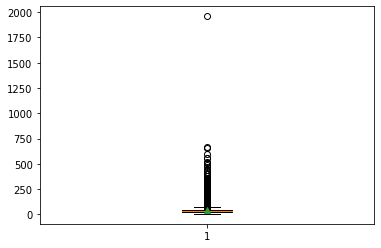

In [17]:
plt.boxplot(len_data, showmeans=True)

In [18]:
len2 = [len_text for len_text in len_data if len_text < 1000]

{'boxes': [<matplotlib.lines.Line2D at 0x7fbf14d87b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbf14d90bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf14d9e190>],
 'means': [<matplotlib.lines.Line2D at 0x7fbf14d96c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf14d966d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbf14d90150>,
  <matplotlib.lines.Line2D at 0x7fbf14d90690>]}

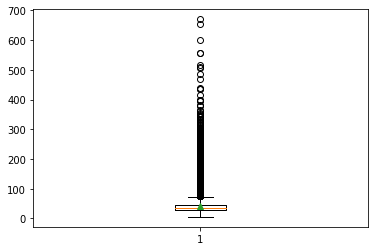

In [19]:
plt.boxplot(len2, showmeans = True)

(array([1.4400e+02, 7.8471e+04, 6.6946e+04, 3.1226e+04, 1.1865e+04,
        5.3400e+03, 2.5730e+03, 1.2770e+03, 7.4900e+02, 4.2700e+02,
        2.9900e+02, 1.7000e+02, 1.3600e+02, 1.0100e+02, 6.1000e+01,
        4.0000e+01, 3.8000e+01, 2.9000e+01, 2.3000e+01, 1.5000e+01,
        1.9000e+01, 6.0000e+00, 7.0000e+00, 7.0000e+00, 3.0000e+00,
        5.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  5. ,  18.3,  31.6,  44.9,  58.2,  71.5,  84.8,  98.1, 111.4,
        124.7, 138. , 151.3, 164.6, 177.9, 191.2, 204.5, 217.8, 231.1,
        244.4, 257.7, 271. , 284.3, 297.6, 310.9, 324.2, 337.5, 350.8,
        364.1, 377.4, 390.7, 404. , 417.3, 430.6, 443.9, 457.2, 470.5,
        483.8, 497.1, 510.4, 523.7

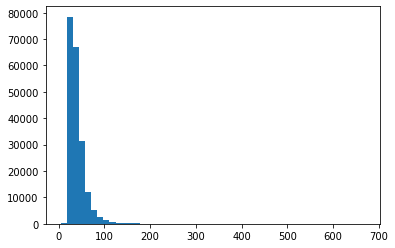

In [20]:
plt.hist(len2, bins = 50)

Most of data example has length less than 70.

Mean of length is 32.605.

It's seem like a good idea to just work with short text and truncate long text into multiple texts.

# Process new data with max_length of 62 words.

In [ ]:
# def process_data(data):
#   result = []
#   ind = []
#   for id, text in enumerate(data):
#     len_text = len(text.split())
#     if len_text > 62:
#       new_text = " ".join(text.split()[:62])
#       result.append(new_text)
#       ind.append(id)
#     else:
#       result.append(text)
#   return ind, result

In [ ]:
# ind, short_data = process_data(tokenized_data)

In [ ]:
# for i in range(5):
#   print("text: ", short_data[ind[i]], "\nlabel", label[ind[i]])

text:  Trong hai ngày,, Hội_thảo có hai báo_cáo của hai chuyên_gia đến từ Pháp tại phiên toàn_thể và báo_cáo trình_bày tại sáu tiểu_ban, xoay quanh các nội_dung: an_toàn thông_tin; các hệ_thống thông_minh; mã nguồn mở; công_nghệ mạng và mạng không dây; giáo_dục điện_tử, đào_tạo từ xa; các hệ_thống tích_hợp; CNTT trong KTXH Hội_thảo lần này thu_hút sự quan_tâm, tham_gia của hàng trăm nhà_khoa_học, 
label Công nghệ.txt
text:  Anh Tín kể mình mới cưới vợ mấy tháng nay, tết này chắc không_thể cùng vợ về quê đón tết vì anh phải ở lại Sài_Gòn trực Trên mỗi ghe vớt rác có công_nhân, người cầm lái, người kia có nhiệm_vụ vớt rác kiêm hướng_dẫn hướng đi vì ghe_tàu có_thể va trúng các vật_thể, gây hư_hại Để dòng nước được sạch_sẽ, góp_phần 
label None.txt
text:  " Biệt phủ " xâm_phạm nghiêm_trọng hành_lang đê quốc_gia nhưng không được xử_lý dứt_điểm Tương_tự, đối_với " biệt phủ " vi_phạm hành_lang thoát lũ, hành_lang đê tả sông Văn_Úc qua địa_bàn xã Quang_Trung và xã Tân_Viên huyện An_Lão, những 

In [21]:
final_data = remove_consecutive_punctuation_mark(tokenized_data)

In [23]:
def punctuation_split(data):
  result = []
  for text in data:
    res_text = ""
    for char in text:
      if char in [".", ",", ";", "!", "?", ":"]:
        res_text += " " + char
      else:
        res_text += char
    result.append(res_text)
  return result

In [24]:
final_data = punctuation_split(final_data)

In [25]:
len(final_data)

200000

# Save dataset with two versions.
Large version: With all about 200000 texts.

Small version: With 80000 texts.

In [26]:
def write_data(data, path):
  with open(path, "w+") as f:
    for item in data:
      f.write(item + "\n") 

In [27]:
# get small version by shuffle and get sample
c = list(zip(final_data, label))
random.shuffle(c)
final_data, label = zip(* c)

small_version_data, small_version_label = final_data[:80000], label[:80000]

In [28]:
write_data(final_data, "200k_full_length_dataset/data.txt")
write_data(label, "200k_full_length_dataset/label.txt")

write_data(small_version_data, "80k_full_length_dataset/data.txt")
write_data(small_version_label, "80k_full_length_dataset/label.txt")